# Data Process

In [1]:
import collections as c
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
from scipy import stats as st
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator
from tqdm.auto import tqdm

## Converting .txt file into pandas

In [2]:
ds = open('p1dataset2021.txt','rt')
ds = ds.read()

# seperates each individuals
ds = ds.split('\n')
temp = list()
df=list()

# creates each individual info in each row
for data in ds:
    df.append(data.split(' '))

# converting lists into pandas
df = pd.DataFrame(df)
df = df.drop([995])

# creating a same size of df for binary maxtrix X
X = pd.DataFrame().reindex_like(df)


# creating a df for keeping track of population
population = pd.DataFrame(df[2])
population = population.rename(columns={2:'population'})
ppl = np.unique(population)

# creating a df for keeping track of gender
genderDf = pd.DataFrame(df[1])
genderDf = genderDf.rename(columns={1:'gender'})
gender = np.unique(genderDf)

df

0     1     2     3     4     5     6     7     8     9      ... 10094  \
0    HG01879     1   ACB     G     G     T     T     A     A     C  ...     T   
1    HG01880     2   ACB     A     A     T     T     A     G     C  ...     G   
2    HG01881     2   ACB     A     A     T     T     A     A     G  ...     G   
3    HG01882     1   ACB     A     A     T     C     A     A     G  ...     G   
4    HG01883     2   ACB     G     A     T     C     G     A     C  ...     G   
..       ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
990  NA20361     2   ASW     G     G     T     T     A     G     C  ...     G   
991  NA20362     1   ASW     G     A     T     T     A     G     C  ...     G   
992  NA20364     2   ASW     A     A     G     C     G     G     G  ...     G   
993  NA20412     2   ASW     G     G     G     T     A     G     C  ...     G   
994  NA20413     1   ASW     G     G     G     T     A     A     C  ...     G   

    10095 10096 10097 10098 10099 10100 10101 10102 10103  
0       A     T     A     A     T     T     T     G     A  
1       C     T     G     A     T     C     T     G     G  
2       C     T     G     A     T     C     T     G     G  
3       A     T     G     A     T     C     T     G     G  
4       C     T     G     A     T     C     T     G     G  
..    ...   ...   ...   ...   ...   ...   ...   ...   ...  
990     A     T     G     A     T     C     T     G     G  
991     A     T     G     A     T     C     T     G     G  
992     A     T     G     A     T     C     T     G     G  
993     C     T     G     A     T     C     T     G     G  
994     A     T     G     A     T     C     T     G     G  

[995 rows x 10104 columns]

## Creating a row for each columns.mode()

In [3]:
mode = df.mode().head(1)
mode[0][0] = 'mode'

mode

0     1     2     3     4     5     6     7     8     9      ... 10094  \
0  mode     1   YRI     G     A     T     C     A     G     G  ...     T   

  10095 10096 10097 10098 10099 10100 10101 10102 10103  
0     C     C     G     A     T     C     T     G     G  

[1 rows x 10104 columns]

## Based on the mode row, this cell marks each row's mutation as 1 and the rest as 0 in each columns and returns Binary Matrix X

In [4]:
for i in tqdm(range(3, len(df.columns)), position = 0,leave=False):
    X[i] = (df[i] == mode[i][0])

X = X.replace({True: 0, False: 1})
X = X.drop(columns = [0, 1, 2])
X.columns = range(X.shape[1])

X


0      1      2      3      4      5      6      7      8      9      \
0        0      1      0      1      0      1      1      0      0      0   
1        1      0      0      1      0      0      1      0      1      1   
2        1      0      0      1      0      1      0      0      0      0   
3        1      0      0      0      0      1      0      0      0      0   
4        0      0      0      0      1      1      1      0      0      0   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
990      0      1      0      1      0      0      1      1      1      0   
991      0      0      0      1      0      0      1      0      0      0   
992      1      0      1      0      1      0      0      0      1      0   
993      0      1      1      1      0      0      1      1      1      0   
994      0      1      1      1      0      1      1      0      1      0   

     ...  10091  10092  10093  10094  10095  10096  10097  10098  10099  10100  
0    ...      0      1      1      1      0      0      1      0      0      1  
1    ...      1      0      1      0      0      0      0      0      0      0  
2    ...      1      0      1      0      0      0      0      0      0      0  
3    ...      1      1      1      0      0      0      0      0      0      0  
4    ...      1      0      1      0      0      0      0      0      0      0  
..   ...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  
990  ...      1      1      1      0      0      0      0      0      0      0  
991  ...      1      1      1      0      0      0      0      0      0      0  
992  ...      1      1      1      0      0      0      0      0      0      0  
993  ...      1      0      1      0      0      0      0      0      0      0  
994  ...      1      1      1      0      0      0      0      0      0      0  

[995 rows x 10101 columns]

## Standardizing the input X

In [5]:
X = X.to_numpy()
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Perfroming dimention reductions via PCA

In [6]:
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents,columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4'])
finalDf = pd.concat([principalDf, population, genderDf], axis = 1)


finalDf

principal component 1  principal component 2  principal component 3  \
0                10.676260              -1.477464               7.542040   
1                26.566809               5.022393              -2.050859   
2                20.237841               1.645767              -3.070468   
3                -0.616992              -1.728475               7.208177   
4                 7.812477               0.888278              -5.739356   
..                     ...                    ...                    ...   
990              18.773154              -0.288626              -4.317050   
991              16.568558               0.323791               5.241607   
992              17.945461               0.035457              -3.841371   
993              12.536740              -1.220061              -4.005563   
994               4.727620              -0.089079               6.278903   

     principal component 4 population gender  
0                -1.037225        ACB      1  
1                -7.579868        ACB      2  
2                -4.143649        ACB      2  
3                 0.977976        ACB      1  
4                -2.601333        ACB      2  
..                     ...        ...    ...  
990              -2.603146        ASW      2  
991              -1.967604        ASW      1  
992              -7.348297        ASW      2  
993              -5.783592        ASW      2  
994              -2.123192        ASW      1  

[995 rows x 6 columns]

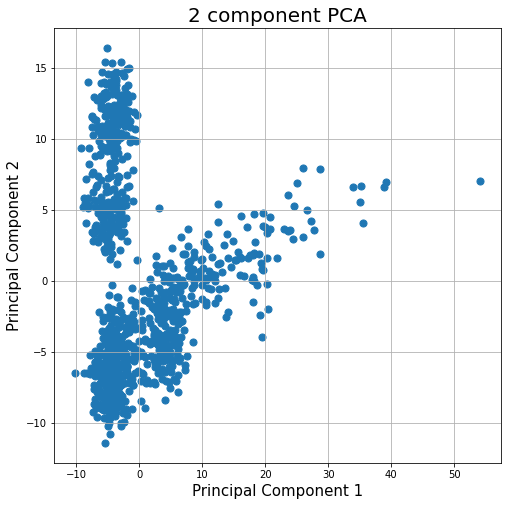

In [7]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
   
ax.scatter(finalDf['principal component 1'],
           finalDf['principal component 2'],
           s = 50)

ax.grid()

## Q(A)
(10 points) As the data is in a high-dimensional space, let’s start with the clustering based on the
projection on the first two principal components V1 and V2. Look at your plot in Part (b) of mini-project
1. If you are to manually form clusters, how many would you form? Note that you should not use any
color/population information in that plot when forming clusters, i.e, you should only separate points
based on distance/density. You can see that some populations are genetically close to each other and
belong to the same cluster. 

## My Respose
I would form at least two to three clusters. Without using population information, at least we can clearly distinguish two clusters with lots of outliers.

## Q(B)
(20 points) Now run K-means++ clustering on the first two principal components of the 995 samples
with K equal to what you observed in part (a). Try to run it multiple times with different initialization while
keeping all the remaining settings the same. What can you observe? Plot the best clustering results
using color-coded scatter plot (one color for each cluster). 

## My response:
The initial centers deeply affect the model performance and result in some object points being labeled as different cluster groups in different situations.

In [8]:
PC1 = pd.DataFrame(finalDf['principal component 1'])
PC2 = pd.DataFrame(finalDf['principal component 2'])
PC12 = pd.concat([PC1,PC2], axis = 1)
PC12 = PC12.to_numpy()

Text(0.5, 1.0, 'K = 3')

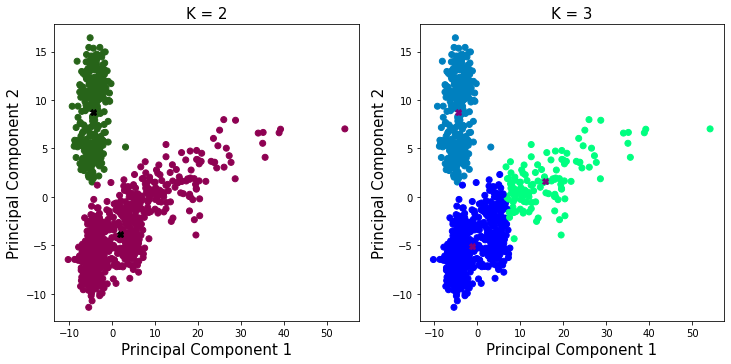

In [9]:
plt.figure(figsize=(12, 12))

## K = 2
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=10)
y_pred = kmeans.fit_predict(PC12)

plt.subplot(221)
plt.scatter(PC12[:, 0], PC12[:, 1], c = y_pred, cmap='PiYG')
plt.plot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],'X', color = 'black' )
plt.xlabel('Principal Component 1', fontsize = 15)
plt.ylabel('Principal Component 2', fontsize = 15)
plt.title("K = 2", fontsize = 15)

## K = 3
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=10)
y_pred = kmeans.fit_predict(PC12)

plt.subplot(222)
plt.scatter(PC12[:, 0], PC12[:, 1], c = y_pred, cmap='winter')
plt.plot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],'X', color = 'purple' )
plt.xlabel('Principal Component 1', fontsize = 15)
plt.ylabel('Principal Component 2', fontsize = 15)
plt.title("K = 3", fontsize = 15)

## Q(C)
(20 points) Now do the elbow curve for a range of K values. From the curve, can you say that your
choice of K in (b) is reasonable? If yes, briefly explain why. If not, report the color-coded scatter plot of
the clustering results using a reasonable K value. 

## My Response:
My choice of K in this case is reasonable. Prof. Shi said that there wasn't a clear and concrete mathematical way to decide K. In my own perspective, I would say that based on the slope of the SSE-K plot, I would choose those when the slope changes "at least a certain amount". For example, we can clearly see that from K range(5,6) and range(6,7), the slope remains the same, while from K range(2,3) and range(3,4), the slope changes in a certain amount. This also happens from K range(3,4) and range(4,5). Hence I plot when K = 4.


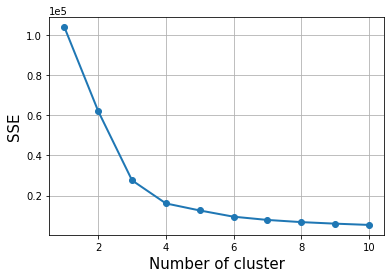

In [10]:
SSE = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=10, max_iter=1000).fit(PC12)
    SSE[k] = kmeans.inertia_ 



plt.figure()
plt.plot(list(SSE.keys()), list(SSE.values()), linewidth=2.0, marker = 'o')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xlabel("Number of cluster", fontsize = 15)
plt.ylabel("SSE", fontsize = 15)
plt.grid(True)

plt.show()


Text(0.5, 1.0, 'K = 4')

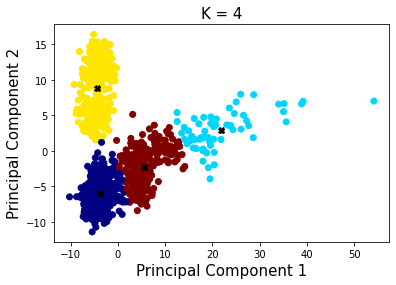

In [11]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=10)
y_pred = kmeans.fit_predict(PC12)


plt.scatter(PC12[:, 0], PC12[:, 1], c = y_pred, cmap='jet')
plt.plot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],'X', color = 'black' )
plt.xlabel('Principal Component 1', fontsize = 15)
plt.ylabel('Principal Component 2', fontsize = 15)
plt.title("K = 4", fontsize = 15)

## Q(D)
(20 points) Now run DBSCAN clustering on the first two principal components. Try to use different
values of the two metrics, epsilon and minPts, while keeping all the remaining settings the same. What
can you observe? Plot the best clustering results using color-coded scatter plot (one color for each
cluster). 

## My Response
From my observation, epsilon is more decisive than minPts. For experiments, I set epsilon a fixed number while observing the different plots based on different minPts values, and vice versa. However, I couldn't find a proper pair(maybe because of the nature of this dataset using PC1 and PC2). I then  tried to find a best-fit epsilon using KNN while setting minPts = 4 (Inspired from paper [Ester et al., 1996]). Theoretically, the best performance is when (epsilon, minPts) = (1.53, 4), which seems not to be very convincing compared to previous plots using K Means.

### Setting (epsilon, minPts) = ( range(1,9,1), constant = 4 )

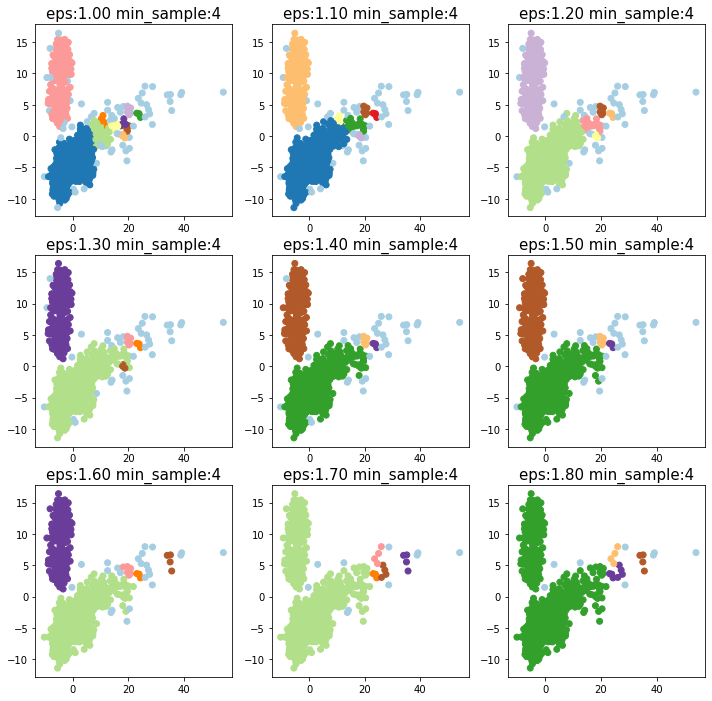

In [12]:
plt.figure(figsize=(12, 12))
eps = np.arange(1.0,1.9,0.1)
min_samples = [4]*9

for i in range(len(eps)):
    plt.subplot(331+i)
    db = DBSCAN(eps = eps[i], min_samples=min_samples[i])
    y_pred = db.fit_predict(PC12)
    plt.scatter(PC12[:,0], PC12[:,1],c=y_pred, cmap='Paired')
    plt.title("DBSCAN")
    # plt.xlabel('Principal Component 1', fontsize = 15)
    # plt.ylabel('Principal Component 2', fontsize = 15)
    plt.title("eps:{:.2f} min_sample:{}".format(eps[i],min_samples[i]), fontsize = 15)

### Setting (epsilon, minPts) = ( constant = 1.53, range(2,11,1) )

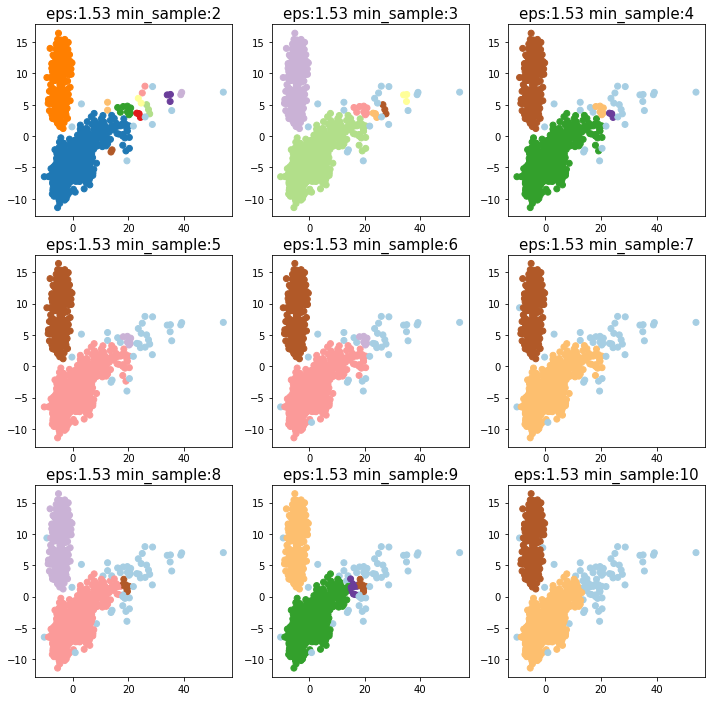

In [13]:
plt.figure(figsize=(12, 12))
eps = [1.53]*9
min_samples = np.arange(2,11,1)

for i in range(len(eps)):
    plt.subplot(331+i)
    db = DBSCAN(eps = eps[i], min_samples=min_samples[i])
    y_pred = db.fit_predict(PC12)
    plt.scatter(PC12[:,0], PC12[:,1],c=y_pred, cmap='Paired')
    plt.title("DBSCAN")
    # plt.xlabel('Principal Component 1', fontsize = 15)
    # plt.ylabel('Principal Component 2', fontsize = 15)
    plt.title("eps:{:.2f} min_sample:{}".format(eps[i],min_samples[i]), fontsize = 15)

## Using KNN to find best-fit Epsilon 
Using Knn to find best-fit Epsilon based on Maximum Curvature of average distance between each point and its k nearest neighbors plot. 
From [Ester et al., 1996], here I set K = 4 since we are using 2-dimention input.

the Maximum Curvature point is (x = 977.0, y = 1.3161228680809325)


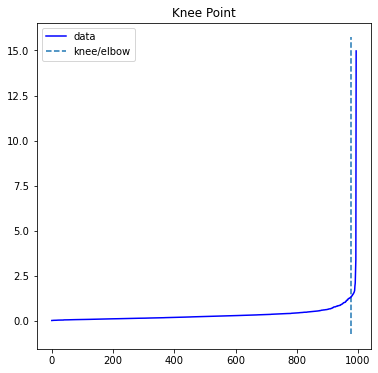

In [14]:
knn = NearestNeighbors(n_neighbors=4)
knn_fit = knn.fit(PC12)
distances, indices = knn_fit.kneighbors(PC12)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
kneedle = KneeLocator(np.linspace(0,994,995), distances, S=1.0, curve="convex", direction="increasing")
print('the Maximum Curvature point is (x = {}, y = {})'.format(kneedle.elbow, distances[int(kneedle.elbow)]))
kneedle.plot_knee()

### Setting (epsilon, minPts) = ( constant = 1.53, 4 )

No handles with labels found to put in legend.


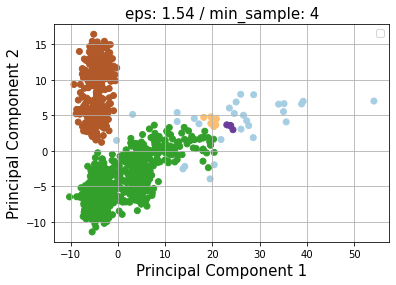

In [19]:
db = DBSCAN(eps = 1.5365259364380837, min_samples=4)
y_pred = db.fit_predict(PC12)
plt.scatter(PC12[:,0], PC12[:,1],c=y_pred, cmap='Paired')
plt.title("DBSCAN")
plt.xlabel('Principal Component 1', fontsize = 15)
plt.ylabel('Principal Component 2', fontsize = 15)
plt.title("eps: {:.2f} / min_sample: {}".format(1.5367,4), fontsize = 15)
plt.legend()
plt.grid(True)

## Q(E)
(10 points) Compare the results from (b)/(c) and (d) with your observed clustering from (a). Can you say
which algorithm is better in this case and why? 

## My Response
From my eyeballing observation with the plots, I would say that IN THIS CASE using K Means is way better than DBSCAN since the nature of this dataset using PC1 vs PC2 is against the concept of DBSCAN (which utilized density). For example, the left side of the plot would be considered different clusters with Kmeans, however, since it is very "crowded", DBSCAN is not able to distinguish them; and on the right side of the plot, the data points are so scattered that DBSCAN would consider them noises(outliers).

## Q(F)
(20 points) Now use the better algorithm and directly cluster the original high-dimensional data (without
PCA). Although you cannot do scatter plot on the high-dimensional data, you can still exam the
clustering result (i.e., which individuals/samples belong to the same cluster). Does it correlate well with
the clustering results based on the first two principal components? Why or why not?

## My Response
It does correlate but not to the “well” level. From a pure machine learning perspective K=6 should be the best, but with domain knowledge that genes from the same regions have also been clustered quite close to each other, K =4 should be enough.

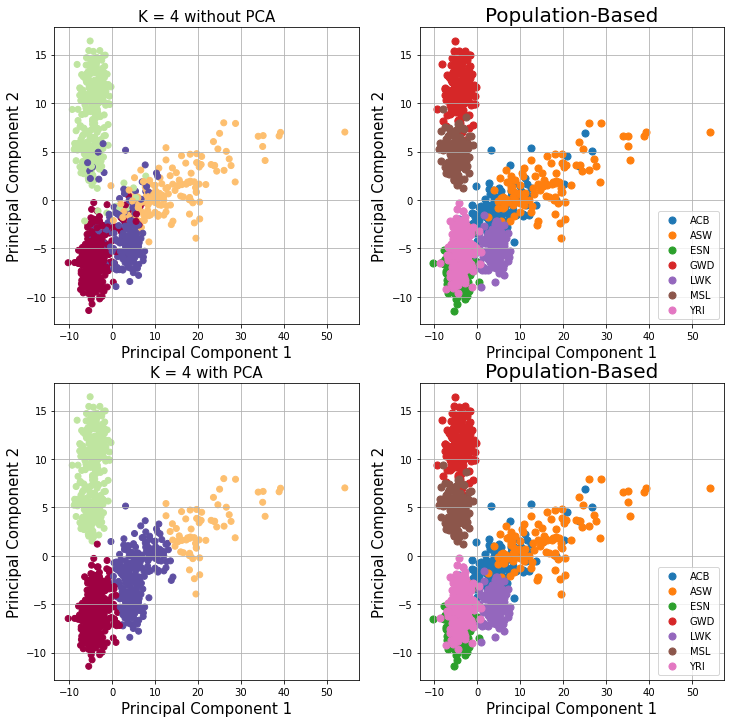

In [60]:
plt.figure(figsize=(12, 12))

## K = 4 without PCA
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=10)
y_pred = kmeans.fit_predict(X)

plt.subplot(221)
plt.scatter(PC12[:, 0], PC12[:, 1], c = y_pred, cmap='Spectral')
plt.xlabel('Principal Component 1', fontsize = 15)
plt.ylabel('Principal Component 2', fontsize = 15)
plt.title("K = 4 without PCA", fontsize = 15)
plt.grid(True)


## population based
plt.subplot(222)
plt.xlabel('Principal Component 1', fontsize = 15)
plt.ylabel('Principal Component 2', fontsize = 15)
plt.title('Population-Based', fontsize = 20)

for person in ppl:
    indicesToKeep = finalDf['population'] == person
    plt.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
               finalDf.loc[indicesToKeep, 'principal component 2'],
               s = 50)
plt.legend(ppl)
plt.grid(True)


k
## K = 4 with PCA
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=10)
y_pred = kmeans.fit_predict(PC12)

plt.subplot(223)
plt.scatter(PC12[:, 0], PC12[:, 1], c = y_pred, cmap='Spectral')
plt.xlabel('Principal Component 1', fontsize = 15)
plt.ylabel('Principal Component 2', fontsize = 15)
plt.title("K = 4 with PCA & Kmeans++", fontsize = 15)
plt.grid(True)

plt.subplot(224)
plt.xlabel('Principal Component 1', fontsize = 15)
plt.ylabel('Principal Component 2', fontsize = 15)
plt.title('Population-Based', fontsize = 20)

for person in ppl:
    indicesToKeep = finalDf['population'] == person
    plt.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
               finalDf.loc[indicesToKeep, 'principal component 2'],
               s = 50)
plt.legend(ppl)
plt.grid(True)


## Elbow Plot without PCA
In this case K = 6 

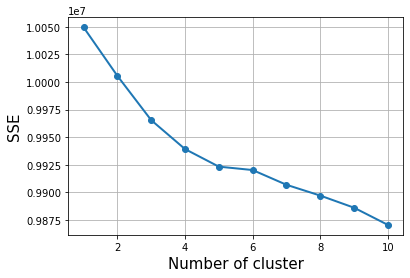

In [61]:
SSE = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=10, max_iter=1000).fit(X)
    SSE[k] = kmeans.inertia_ 

plt.figure()
plt.plot(list(SSE.keys()), list(SSE.values()), linewidth=2.0, marker = 'o')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xlabel("Number of cluster", fontsize = 15)
plt.ylabel("SSE", fontsize = 15)
plt.grid(True)
plt.show()


## K = 6 without PCA vs Population-Based

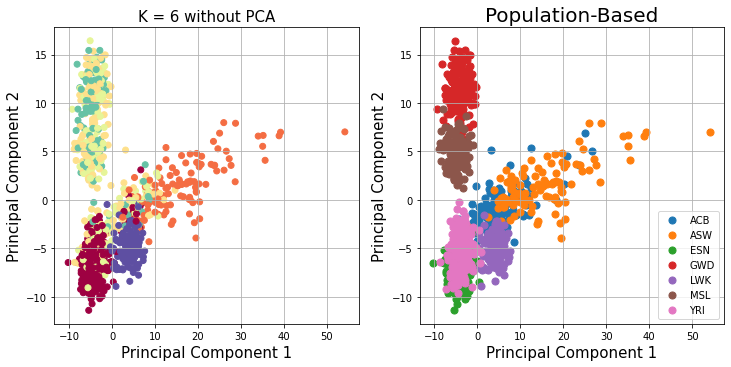

In [64]:
plt.figure(figsize=(12, 12))

## K = 6
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=10)
y_pred = kmeans.fit_predict(X)

plt.subplot(221)
plt.scatter(PC12[:, 0], PC12[:, 1], c = y_pred, cmap='Spectral')
plt.xlabel('Principal Component 1', fontsize = 15)
plt.ylabel('Principal Component 2', fontsize = 15)
plt.title("K = 6 without PCA", fontsize = 15)
plt.grid(True)

## population based
plt.subplot(222)
plt.xlabel('Principal Component 1', fontsize = 15)
plt.ylabel('Principal Component 2', fontsize = 15)
plt.title('Population-Based', fontsize = 20)

for person in ppl:
    indicesToKeep = finalDf['population'] == person
    plt.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
               finalDf.loc[indicesToKeep, 'principal component 2'],
               s = 50)
plt.legend(ppl)
plt.grid(True)